In [85]:
# !pip install pandas
# !pip install matplotlib
# !pip install mplsoccer
# !pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [86]:
# Read in the data
passes = pd.read_csv("messibetis.csv")

In [87]:
passes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   player   49 non-null     object
 1   minute   49 non-null     int64 
 2   second   49 non-null     int64 
 3   x        49 non-null     int64 
 4   y        49 non-null     int64 
 5   type     49 non-null     object
 6   outcome  49 non-null     object
 7   endX     49 non-null     int64 
 8   endY     49 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 3.6+ KB


In [88]:
passes_cols_dict={
    'x':'x_start',
    'y':'y_start',
    'endX':'x_end',
    'endY':'y_end'
}


# Rename columns
passes.rename(passes_cols_dict, axis=1, inplace=True)

In [89]:
passes.head()

,player,minute,second,x_start,y_start,type,outcome,x_end,y_end
0,messi,45,0,50,50,Pass,Successful,40,43
1,messi,45,25,63,48,Pass,Successful,75,83
2,messi,46,4,74,58,Pass,Successful,71,65
3,messi,46,7,76,68,Pass,Successful,95,78
4,messi,46,55,100,1,Pass,Unsuccessful,96,38


In [90]:
# MPLsoccer pitch uses 120,80 pitch
# conforming my co-ords to match this
passes['x_start'] = passes['x_start'] * 1.2
passes['y_start'] = passes['y_start'] * 0.8
passes['x_end'] = passes['x_end'] * 1.2
passes['y_end'] = passes['y_end'] * 0.8

In [91]:
# check outcome of co-ord conversion
passes.head()

,player,minute,second,x_start,y_start,type,outcome,x_end,y_end
0,messi,45,0,60.0,40.0,Pass,Successful,48.0,34.4
1,messi,45,25,75.6,38.4,Pass,Successful,90.0,66.4
2,messi,46,4,88.8,46.4,Pass,Successful,85.2,52.0
3,messi,46,7,91.2,54.4,Pass,Successful,114.0,62.4
4,messi,46,55,120.0,0.8,Pass,Unsuccessful,115.2,30.4


In [92]:
# Calcualate percentage pass success rate 
outcome_counts = passes['outcome'].value_counts()
success_rate = round((outcome_counts['Successful'] / len(passes)) * 100, 2)

print("Pass Success Rate: ", success_rate)

Pass Success Rate:  81.63


Text(0.5, 1.0, 'Messi Pass Map vs Real Betis')

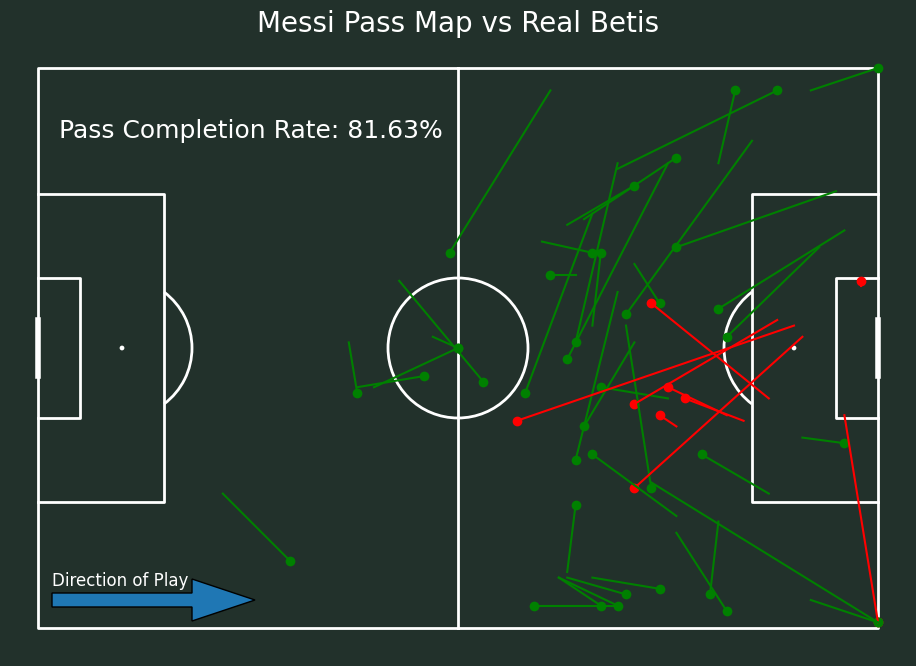

In [93]:
# Create base figure for visual
fig, ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

# Create the pitch visual
pitch = Pitch(pitch_type='statsbomb',line_color='white', pitch_color='#22312b')
pitch.draw(ax=ax) #ax=ax plots pitch on top of existing plot

# Bottom left of pitch is currently 0,80 but we want 0,0 so need to invert pitch
# Set bottom left co-ord to 0,0
plt.gca().invert_yaxis()

# Generate arrow to show direction of play
ax.arrow(2,4,20,0,width=2)

# Add annotation to arrow
ax.annotate("Direction of Play", xy=(2,6), color='white', fontsize=(12))

# Plot pass path and starting point
for i in range(len(passes['x_start'])):
    if passes['outcome'][i] == 'Successful':
        plt.plot((passes['x_start'][i],passes['x_end'][i]),(passes['y_start'][i],passes['y_end'][i]),color='green')
        plt.scatter(passes['x_start'][i],passes['y_start'][i],color='green')
    if passes['outcome'][i] == 'Unsuccessful':
        plt.plot((passes['x_start'][i],passes['x_end'][i]),(passes['y_start'][i],passes['y_end'][i]),color='red')
        plt.scatter(passes['x_start'][i],passes['y_start'][i],color='red')

# Add annotation to shwo completion rate
annotation_text = "Pass Completion Rate: "  + str(success_rate) + "%"
ax.annotate(annotation_text, xy=(3,70), color='white', fontsize=(18))

# Set title of plot
plt.title("Messi Pass Map vs Real Betis", color='white', size=20)


